<a href="https://colab.research.google.com/github/ubsuny/PHY386/blob/Homework2025/2025/HW/karlguen/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Extenting the Existing Code**

# **Importing Libraries**

In [1]:
# import libraries
import numpy as np
import scipy.linalg as la


# **Calculating frequencies numerically**
From the provided HW2 file

In [2]:
# Let's calculate the frequencies numerically:

def calculate_eigenfrequencies_3mass(k, m):
    """ calculate the eigenfrequencies for our three mass problem.

    Keyword arguments:
    k -- spring constant (N/m)
    m -- mass (kg)

    returns:
    w1 -- first eigenfrequency
    w2 -- second eigenfrequency
    w3 -- third eigenfrequency
    """
    w0_squared = k / m
    w1 = np.sqrt(2*w0_squared)
    w2 = np.sqrt((2-np.sqrt(2)) * w0_squared)
    w3 = np.sqrt((2+np.sqrt(2)) * w0_squared)
    return w1, w2, w3

# Example values
k = 10  # N/m
m = 1   # kg

w1, w2, w3 = calculate_eigenfrequencies_3mass(k, m)

print("Eigenfrequencies:")
print("ω₁ = {:.4f} rad/s".format(w1))
print("ω₂ = {:.4f} rad/s".format(w2))
print("ω₃ = {:.4f} rad/s".format(w3))

Eigenfrequencies:
ω₁ = 4.4721 rad/s
ω₂ = 2.4203 rad/s
ω₃ = 5.8431 rad/s


# **Setting Up The Mass Matrix**

## Testing with hard-coding the variables

In [3]:
k = 10
m = 1
M = np.diag([m , m, m])
print(M)

[[1 0 0]
 [0 1 0]
 [0 0 1]]


In [4]:
K = np.diag([2*k, 2*k, 2*k])+np.array([[0, -k, 0],[-k, 0, -k], [0, -k, 0]])
print(K)

[[ 20 -10   0]
 [-10  20 -10]
 [  0 -10  20]]


In [5]:
np.sqrt(la.eigh(K,M) [0])

array([2.42030254, 4.47213595, 5.84312721])

## Creating Functions to Create Mass and Hardness Matrices

In [6]:
def setup_mass_matix_with_walls(m_list):
  """
  This function creates the mass matrix using the provided masses list as the diagonal terms.
  This list can be any number of masses that the user decides.

  Keyword arguments:
  m_list -- list of masses

  Returns:
  M -- mass matrix
  """
  M = np.diag(m_list)
  return M

In [38]:
M = setup_mass_matix_with_walls([1,1,1])

In [26]:
def setup_stiffness_matrix(k_list, walls=True):
  """
  This function creates the stiffness matrix using the provided stiffness list
  as the diagonal terms. This function provides the user with the option to
  select if there are walls or not using True/False.

  Keyword arguments:
  k_list -- list of stiffnesses
  walls -- indicating if the system has walls, True by default

  Returns:
  K -- stiffness matrix
  """
  K = np.zeros(((len(k_list)-1), (len(k_list)-1)))
  if walls:
    for i in range(len(k_list)-1):
        K[i,i] = k_list[i]+k_list[i+1]
        if i < len(k_list)-2:
          K[i, i+1] = -k_list[i+1]
          K[i+1, i] = -k_list[i+1]
  else:
    # Ititializing the first and last diagonal element seperately from the loop and starting the loop at the second k value
    for i in range(len(k_list)-2):
        K[i,i] = k_list[i]+k_list[i+1]
        if i < len(k_list)-3:
          K[i, i+1] = -k_list[i+2]
          K[i+1, i] = -k_list[i+2]
    K[0,0] = k_list[i+1]
    K[len(k_list)-2, len(k_list)-2] = k_list[i-2]

  return K


In [27]:
K = setup_stiffness_matrix([10, 10, 10, 10], True)

In [28]:
def calculate_eigenfrequencies(K, M):
  """
  Function to solve the spring mass system for a given stiffness matrix K and a given mass matrix M.
  These matrices are used to calculate the eigenfrequencies of the system and are provided
  from the code above by the user.

  Keyword arguments:
  K -- stiffness matrix
  M -- mass matrix

  Returns:
  omega -- The real eigenfrequencies of the system
  """
  eigenvalues, eigenvectors = la.eigh(K,M)
  omega = np.sqrt(eigenvalues)
  return omega

Testing to see if code works overall with no walls

In [29]:
calculate_eigenfrequencies(setup_stiffness_matrix([10,10,10,10], False), setup_mass_matix_with_walls([1,1,1]))

array([1.95439508, 3.16227766, 5.11667274])

Testing if code works with walls

In [32]:
calculate_eigenfrequencies(setup_stiffness_matrix([10,10,10,10], True), setup_mass_matix_with_walls([1,1,1]))

array([2.42030254, 4.47213595, 5.84312721])

This matches with the calculated numerical values above!

We can also test this for different values and number of inputs for both the mass and stiffness matrix!

In [42]:
calculate_eigenfrequencies(setup_stiffness_matrix([15,22,24,22,22], False), setup_mass_matix_with_walls([2,1,3,2]))

array([1.40771687, 2.73861279, 3.74901078, 7.503105  ])

**Therefore, our code will work for any system to n number of masses, every spring and every mass can be different, and we can solve for the case without walls!**

#**AI Creativity**


Using the provided prompt with ChatGPT, I received the following code at first:

##Initial Code

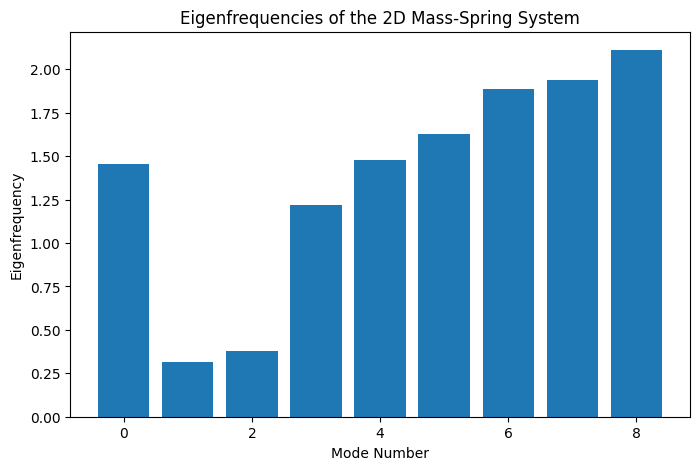

Eigenfrequencies: [1.45429268 0.31241231 0.38009829 1.21649879 1.47828799 1.62626653
 1.8845918  1.93665008 2.11088764]


In [36]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt

def create_stiffness_matrix(n, k_main=1, k_diag=0.5):
    """
    Constructs the stiffness matrix for a 2D lattice of coupled masses.

    Parameters:
    n -- number of masses per row/column (total n^2 masses)
    k_main -- stiffness for horizontal/vertical springs
    k_diag -- stiffness for diagonal springs

    Returns:
    K -- (n^2 x n^2) stiffness matrix
    """
    N = n**2  # Total number of masses
    K = np.zeros((N, N))

    def index(x, y):
        """Convert 2D indices to 1D index."""
        return x * n + y

    for i in range(n):
        for j in range(n):
            idx = index(i, j)

            # Connect to right neighbor
            if j < n - 1:
                K[idx, idx] += k_main
                K[idx, index(i, j+1)] = -k_main
                K[index(i, j+1), idx] = -k_main

            # Connect to bottom neighbor
            if i < n - 1:
                K[idx, idx] += k_main
                K[idx, index(i+1, j)] = -k_main
                K[index(i+1, j), idx] = -k_main

            # Connect to bottom-right diagonal
            if i < n - 1 and j < n - 1:
                K[idx, idx] += k_diag
                K[idx, index(i+1, j+1)] = -k_diag
                K[index(i+1, j+1), idx] = -k_diag

            # Connect to bottom-left diagonal
            if i < n - 1 and j > 0:
                K[idx, idx] += k_diag
                K[idx, index(i+1, j-1)] = -k_diag
                K[index(i+1, j-1), idx] = -k_diag

    return K

# Define system size
n = 3  # A 3x3 mass grid
K = create_stiffness_matrix(n)

# Compute eigenfrequencies
eigenvalues, eigenvectors = scipy.linalg.eigh(K)
eigenfrequencies = np.sqrt(np.abs(eigenvalues))  # Ensure positive frequencies

# Plot eigenfrequencies
plt.figure(figsize=(8, 5))
plt.bar(range(len(eigenfrequencies)), eigenfrequencies)
plt.xlabel("Mode Number")
plt.ylabel("Eigenfrequency")
plt.title("Eigenfrequencies of the 2D Mass-Spring System")
plt.show()

print("Eigenfrequencies:", eigenfrequencies)


##Final Code

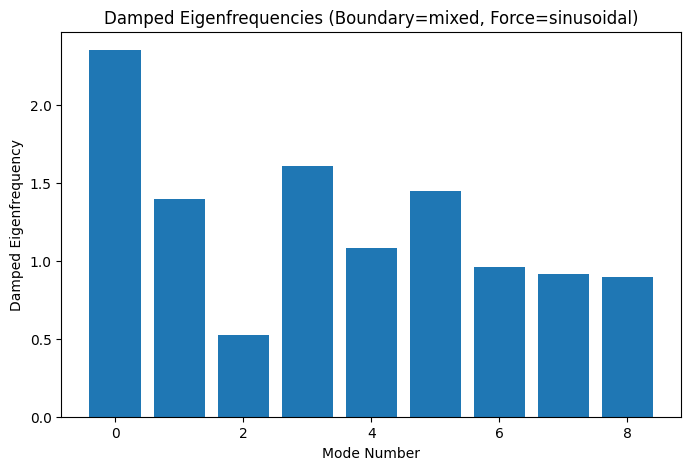

Eigenfrequencies with Damping: [2.34954453 1.39735126 0.52653614 1.60788973 1.07940573 1.44665875
 0.95635505 0.91295129 0.89829729]


In [37]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt

def index(x, y, n):
    """Convert 2D indices to 1D index."""
    return x * n + y

def create_stiffness_matrix(n, k_mean=1, k_var=0.5, boundary_type="mixed"):
    """
    Constructs a stiffness matrix for a 2D mass-spring system.

    Parameters:
    n -- number of masses per row/column (total n^2 masses)
    k_mean -- mean stiffness for springs
    k_var -- variance in stiffness for randomization
    boundary_type -- "fixed", "free", "mixed"

    Returns:
    K -- (n^2 x n^2) stiffness matrix
    """
    N = n**2  # Total masses
    K = np.zeros((N, N))

    # Random stiffness values
    k_main = np.abs(np.random.normal(k_mean, k_var, (n, n)))
    k_diag = np.abs(np.random.normal(k_mean / 2, k_var / 2, (n, n)))

    for i in range(n):
        for j in range(n):
            idx = index(i, j, n)

            # Right neighbor
            if j < n - 1:
                K[idx, idx] += k_main[i, j]
                K[idx, index(i, j+1, n)] = -k_main[i, j]
                K[index(i, j+1, n), idx] = -k_main[i, j]

            # Bottom neighbor
            if i < n - 1:
                K[idx, idx] += k_main[i, j]
                K[idx, index(i+1, j, n)] = -k_main[i, j]
                K[index(i+1, j, n), idx] = -k_main[i, j]

            # Bottom-right diagonal
            if i < n - 1 and j < n - 1:
                K[idx, idx] += k_diag[i, j]
                K[idx, index(i+1, j+1, n)] = -k_diag[i, j]
                K[index(i+1, j+1, n), idx] = -k_diag[i, j]

            # Bottom-left diagonal
            if i < n - 1 and j > 0:
                K[idx, idx] += k_diag[i, j]
                K[idx, index(i+1, j-1, n)] = -k_diag[i, j]
                K[index(i+1, j-1, n), idx] = -k_diag[i, j]

    # Apply boundary conditions
    if boundary_type == "fixed":
        for i in range(n):
            for j in range(n):
                if i == 0 or i == n-1 or j == 0 or j == n-1:
                    idx = index(i, j, n)
                    K[idx, :] = 0
                    K[:, idx] = 0
                    K[idx, idx] = 1

    elif boundary_type == "mixed":
        for i in range(n):
            for j in range(n):
                if i == 0:  # Fix top row
                    idx = index(i, j, n)
                    K[idx, :] = 0
                    K[:, idx] = 0
                    K[idx, idx] = 1
                elif j == n-1:  # Free right edge
                    idx = index(i, j, n)
                    K[idx, idx] /= 2

    return K

def create_mass_matrix(n, m_mean=1, m_var=0.2):
    """
    Constructs a diagonal mass matrix with non-uniform masses.
    """
    N = n**2
    m_values = np.abs(np.random.normal(m_mean, m_var, N))
    return np.diag(m_values)

def create_damping_matrix(M, K, alpha=0.01, beta=0.01):
    """
    Constructs a damping matrix using Rayleigh damping.
    """
    return alpha * M + beta * K

def apply_external_forces(n, force_type="sinusoidal", F0=1, omega=1):
    """
    Generates an external force vector for the system.
    """
    N = n**2
    F = np.zeros(N)

    if force_type == "sinusoidal":
        for i in range(n):
            F[index(i, 0, n)] = F0 * np.sin(omega * i)  # Apply force to the left column

    elif force_type == "impulse":
        F[N//2] = F0  # Impulse at center

    elif force_type == "random":
        F = np.random.normal(0, F0, N)

    return F

# Define system parameters
n = 3  # 3x3 mass grid
boundary_type = "mixed"  # "fixed", "free", or "mixed"
force_type = "sinusoidal"  # "sinusoidal", "impulse", "random"
alpha, beta = 0.02, 0.02  # Damping coefficients

# Create matrices
K = create_stiffness_matrix(n, boundary_type=boundary_type)
M = create_mass_matrix(n)
C = create_damping_matrix(M, K, alpha, beta)
F = apply_external_forces(n, force_type=force_type)

# Solve the damped eigenvalue problem
evals, evecs = scipy.linalg.eig(K - 1j * C, M)

# Compute damped eigenfrequencies
eigenfrequencies = np.sqrt(np.abs(np.real(evals)))

# Plot eigenfrequencies
plt.figure(figsize=(8, 5))
plt.bar(range(len(eigenfrequencies)), eigenfrequencies)
plt.xlabel("Mode Number")
plt.ylabel("Damped Eigenfrequency")
plt.title(f"Damped Eigenfrequencies (Boundary={boundary_type}, Force={force_type})")
plt.show()

print("Eigenfrequencies with Damping:", eigenfrequencies)


##Comments on AI Model and Iteration Steps

ChatGPT appears to have handled the physics very well, as it did not have any trouble when creating a new iteration. What started off appearing very similar to the system we/I created became a more and more complicated version following every iteration.

Following the questions asked by ChatGPT about how I want the model to be more realistic, I had ChatGPT add on conditions for the system not being connected to walls, being connected to only one wall, adding external forces (like gravity), and a damping effect. It did appear that, at first, ChatGPT wanted to make a much more complicated model than was necessary. I believe if the prompt was more specific to our situation then the initial outcome would have been much more similar to what we/I created above.

It took me six overall iterations to get to this final model. According to ChatGPT, this model could represent several things including Seismic Waves, Biological Systems (such as tissue and cellular networks), Suspension Bridges, Ocean Waves, and Tree Vibrations. I'm not entirely sure if the above system created by ChatGPT is anywhere near complex enough to model any of the last three, but I believe a simple representation of these systems would be possible with the created code.